This is the project basical based on bike sharing system,we already done linear and EDA analysis in project No.5
In this project we will have to try some more regressor and try to improve Accuracy score.

In [1]:
import numpy as np
import pandas as pd
import matplotlib .pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv("bikes.csv")
df.head()

,date,temperature,humidity,windspeed,count
0,2011-01-03,2.716070,45.715346,21.414957,120.0
1,2011-01-04,2.896673,54.267219,15.136882,108.0
2,2011-01-05,4.235654,45.697702,17.034578,82.0
3,2011-01-06,3.112643,50.237349,10.091568,88.0
4,2011-01-07,2.723918,49.144928,15.738204,148.0


In [3]:
df.tail()

,date,temperature,humidity,windspeed,count
186,2011-07-08,28.187490,63.618656,19.761499,692.000000
187,2011-07-09,29.070524,61.346450,21.121738,702.333333
188,2011-07-10,29.953558,59.074244,22.481976,712.666667
189,2011-07-11,30.836592,56.802038,23.842215,723.000000
190,2011-07-12,32.409522,52.521355,17.987135,662.000000


In [4]:
df.describe()

,temperature,humidity,windspeed,count
count,191.000000,191.000000,191.000000,191.000000
mean,15.319033,55.469244,18.605591,461.976440
std,9.876723,7.998748,5.049424,321.669925
min,-2.200000,21.300000,6.941802,9.000000
25%,6.091402,49.593148,14.600733,144.000000
50%,15.769749,55.080463,18.474898,460.000000
75%,24.255189,62.046729,21.621460,740.333333
max,33.113161,72.575560,33.512660,1246.000000


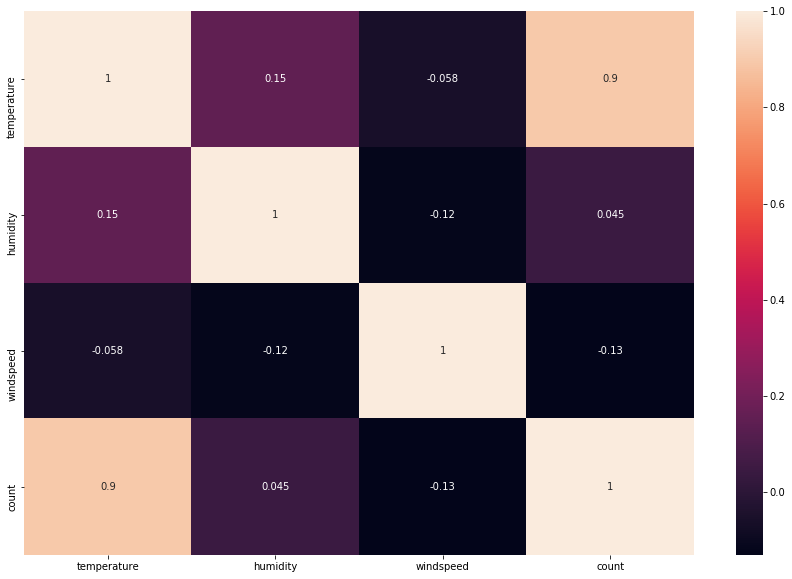

In [5]:
corr_hmap=df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [7]:
df.columns

Index(['date', 'temperature', 'humidity', 'windspeed', 'count'], dtype='object')

In [8]:
df['count'].unique()

array([ 120.        ,  108.        ,   82.        ,   88.        ,
        148.        ,  112.33333333,   76.66666667,   41.        ,
         43.        ,   25.        ,   38.        ,   54.        ,
         42.75      ,   31.5       ,   20.25      ,    9.        ,
         78.        ,   83.        ,   75.        ,   78.66666667,
         82.33333333,   86.        ,  186.        ,   34.        ,
         15.        ,   39.33333333,   40.66666667,   42.        ,
         47.        ,   72.        ,   61.        ,   98.66666667,
        109.33333333,   64.        ,   53.        ,  149.        ,
        168.66666667,  188.33333333,  208.        ,  140.        ,
        218.        ,  259.        ,  579.        ,  452.75      ,
        326.5       ,  200.25      ,   74.        ,  139.        ,
        100.        ,  107.        ,   94.        ,   81.        ,
        137.        ,  231.        ,  123.        ,  214.        ,
        224.        ,  234.        ,  244.        ,  316.     

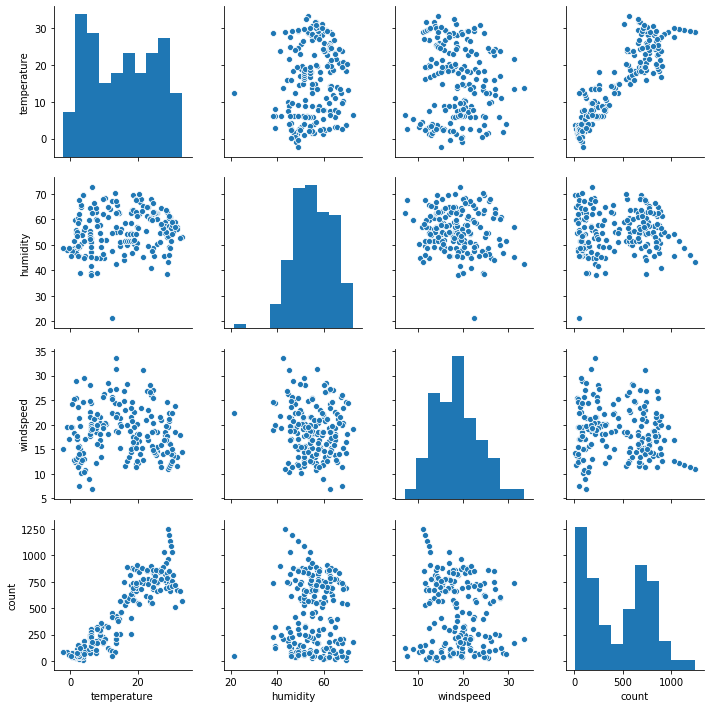

In [9]:
sns.pairplot(df)

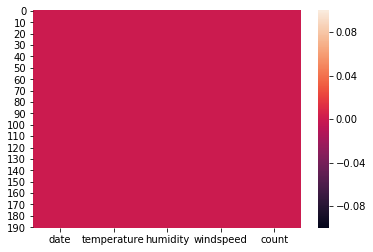

In [10]:
sns.heatmap(df.isnull())

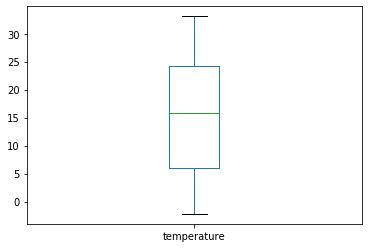

In [11]:
df['temperature'].plot.box()

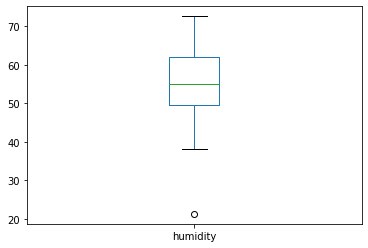

In [12]:
df['humidity'].plot.box()

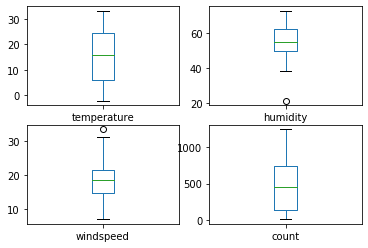

In [13]:
df.plot(kind='box',subplots=True,layout=(2,2))
plt.show()

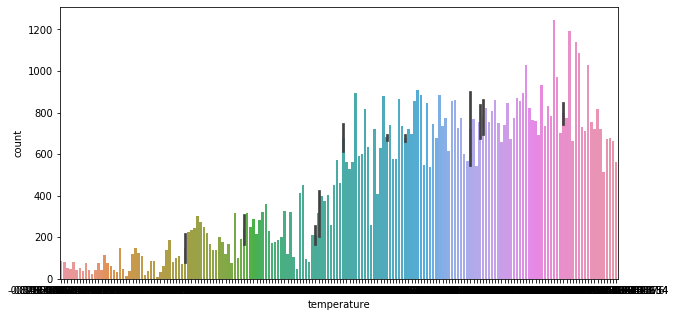

In [14]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='temperature',y='count',data=df)

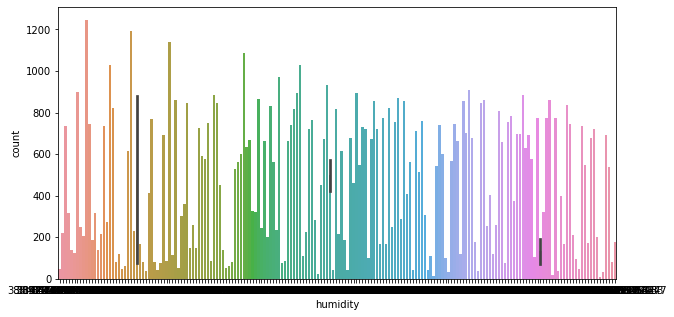

In [15]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='humidity',y='count',data=df)

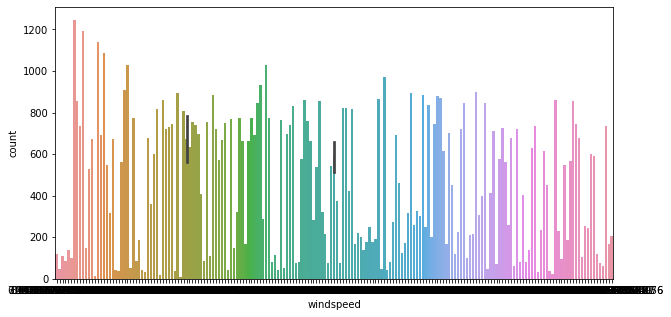

In [16]:
fig=plt.figure(figsize=(10,5))
sns.barplot(x='windspeed',y='count',data=df)

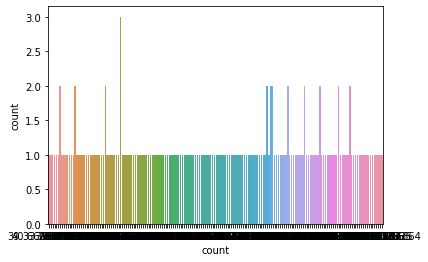

In [17]:
sns.countplot(df['count'])

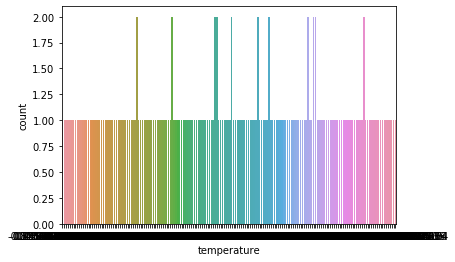

In [18]:
sns.countplot(df['temperature'])

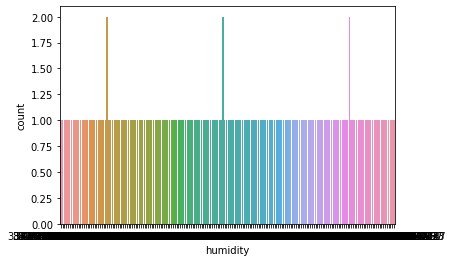

In [19]:
sns.countplot(df['humidity'])

In [20]:
df[2:-2]

,date,temperature,humidity,windspeed,count
2,2011-01-05,4.235654,45.697702,17.034578,82.000000
3,2011-01-06,3.112643,50.237349,10.091568,88.000000
4,2011-01-07,2.723918,49.144928,15.738204,148.000000
5,2011-01-08,1.967445,48.851252,17.035029,112.333333
6,2011-01-09,1.210973,48.557576,18.331855,76.666667
7,2011-01-10,0.454501,48.263900,19.628680,41.000000
8,2011-01-11,1.361393,59.623460,12.414597,43.000000
9,2011-01-12,1.541997,54.775880,25.432188,25.000000
10,2011-01-13,1.158189,47.565957,25.173470,38.000000
11,2011-01-14,0.953048,51.329770,12.729596,54.000000


In [21]:
x=df.iloc[:,1].values
x

array([ 2.71606966,  2.8966733 ,  4.23565354,  3.11264266,  2.72391768,
        1.96744541,  1.21097315,  0.45450089,  1.36139339,  1.54199703,
        1.15818947,  0.95304838,  1.64592111,  2.33879384,  3.03166657,
        3.7245393 ,  7.47504496,  5.95973279,  1.77907655,  0.4527177 ,
       -0.87364115, -2.2       ,  4.06284825,  3.76591521,  2.64831846,
        3.06942892,  2.69449591,  2.31956289,  1.94462988,  2.50794831,
        5.87693129,  2.24881488,  3.4581539 ,  4.45758342,  5.45701293,
        6.45644245,  3.93146854, -0.34271812,  0.13238467,  2.35481272,
        6.09518551,  9.8355583 , 13.57593109,  6.17927846,  8.77081146,
       14.61072633, 18.87418407, 14.65904376, 10.44390346,  6.22876316,
        2.01362286,  3.97647044,  7.64780058, 11.05999729, 11.77070604,
       12.48141478, 13.19212353,  6.20808762,  9.60225377,  2.8138718 ,
        5.95973279,  5.96092489,  5.96211699,  5.9633091 ,  7.4912377 ,
        7.65679103, 12.28900602,  8.68443365,  8.82839667,  8.97

In [22]:
x.shape

(191,)

In [23]:
y=df.iloc[:,-1].values
y

array([ 120.        ,  108.        ,   82.        ,   88.        ,
        148.        ,  112.33333333,   76.66666667,   41.        ,
         43.        ,   25.        ,   38.        ,   54.        ,
         42.75      ,   31.5       ,   20.25      ,    9.        ,
         78.        ,   83.        ,   75.        ,   78.66666667,
         82.33333333,   86.        ,  186.        ,   34.        ,
         15.        ,   38.        ,   39.33333333,   40.66666667,
         42.        ,   47.        ,   72.        ,   61.        ,
         88.        ,   98.66666667,  109.33333333,  120.        ,
         64.        ,   53.        ,   47.        ,  149.        ,
        168.66666667,  188.33333333,  208.        ,  140.        ,
        218.        ,  259.        ,  579.        ,  452.75      ,
        326.5       ,  200.25      ,   74.        ,  139.        ,
        100.        ,  120.        ,  107.        ,   94.        ,
         81.        ,  137.        ,  231.        ,  123.     

In [24]:
y.shape

(191,)

In [25]:
x=x.reshape(-1,1)
x

array([[ 2.71606966],
       [ 2.8966733 ],
       [ 4.23565354],
       [ 3.11264266],
       [ 2.72391768],
       [ 1.96744541],
       [ 1.21097315],
       [ 0.45450089],
       [ 1.36139339],
       [ 1.54199703],
       [ 1.15818947],
       [ 0.95304838],
       [ 1.64592111],
       [ 2.33879384],
       [ 3.03166657],
       [ 3.7245393 ],
       [ 7.47504496],
       [ 5.95973279],
       [ 1.77907655],
       [ 0.4527177 ],
       [-0.87364115],
       [-2.2       ],
       [ 4.06284825],
       [ 3.76591521],
       [ 2.64831846],
       [ 3.06942892],
       [ 2.69449591],
       [ 2.31956289],
       [ 1.94462988],
       [ 2.50794831],
       [ 5.87693129],
       [ 2.24881488],
       [ 3.4581539 ],
       [ 4.45758342],
       [ 5.45701293],
       [ 6.45644245],
       [ 3.93146854],
       [-0.34271812],
       [ 0.13238467],
       [ 2.35481272],
       [ 6.09518551],
       [ 9.8355583 ],
       [13.57593109],
       [ 6.17927846],
       [ 8.77081146],
       [14

In [26]:
x.shape

(191, 1)

In [27]:
y=y.reshape(-1,1)

In [28]:
y.shape

(191, 1)

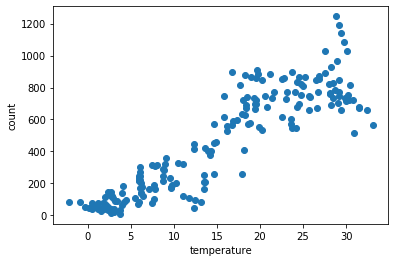

In [29]:
plt.xlabel("temperature")
plt.ylabel("count")
plt.scatter(x,y)

In [30]:
lm=LinearRegression()

In [31]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [32]:
lm.score(x,y)

0.8050517679058149

In [33]:
lm.coef_

array([[29.22197116]])

In [34]:
lm.intercept_

array([14.32410196])

In [37]:
from sklearn.model_selection import train_test_split

from sklearn import model_selection
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [39]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.40,random_state=47)

In [40]:
#Lasso and Redge Model
ls = Lasso()
ls.fit(x_train,y_train)
print(ls.coef_)
print(ls.intercept_)
print(ls.score(x_train,y_train))

[29.8768949]
[1.9714679]
0.778398038823165


In [41]:
rid=Ridge()
rid.fit(x_train,y_train)
print(rid.coef_)
print(rid.intercept_)
print(rid.score(x_train,y_train))

[[29.88516417]]
[1.84133763]
0.778398140748748


In [42]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
dtr.score(x_train,y_train)

0.9913561298633439

In [43]:
from sklearn.ensemble import ExtraTreesRegressor
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.9913561298633439

In [44]:
# Using K Neighbors Regressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [45]:
knn.score(x_train,y_train)

0.8865424158702636

In [46]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(x_train,y_train)
adb.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9175559302940702

In [47]:
#Using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


0.9576267966289639

In [48]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr.score(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\gradient_boosting.py:1450: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9729064824930787

Conclusion-After applying all the algorithm we can conclude that DecisionTree Regressor is best algorithm for that problem
we get 99% Accuracy.